In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [3]:
X_train=joblib.load('models/X_train.pkl')
X_test=joblib.load('models/X_test.pkl')
y_train=joblib.load('models/y_train.pkl')
y_test=joblib.load('models/y_test.pkl')

In [4]:
logistic_model=LogisticRegression(max_iter=1000)

In [5]:
logistic_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_pred=logistic_model.predict(X_test)

In [7]:
accuracy=accuracy_score(y_test, y_pred)

In [8]:
accuracy

0.8947368421052632

In [9]:
f1=f1_score(y_test, y_pred, average='macro')
f1

0.8898336975356665

In [10]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.91      1.00      0.95        53\n           1       0.84      0.81      0.82        57\n           2       0.90      0.94      0.92        70\n           3       0.94      0.98      0.96        60\n           4       1.00      0.98      0.99        65\n           5       0.80      0.80      0.80        55\n           6       0.84      0.72      0.78        58\n\n    accuracy                           0.89       418\n   macro avg       0.89      0.89      0.89       418\nweighted avg       0.89      0.89      0.89       418\n'

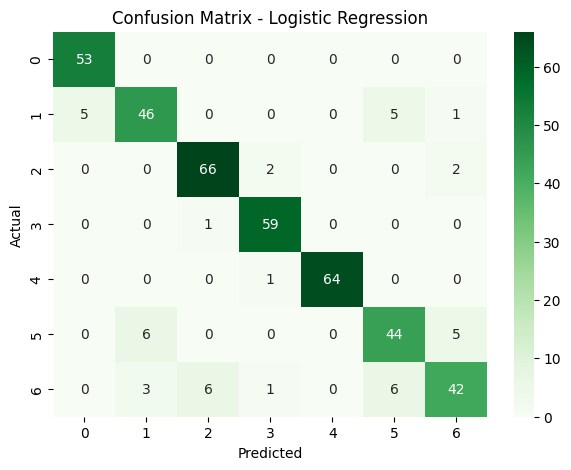

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [12]:
joblib.dump(logistic_model, 'models/logistic_model.pkl')

['models/logistic_model.pkl']

In [13]:
random_forest_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1,max_depth=None)

In [14]:
random_forest_model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [15]:
y_pred_rf=random_forest_model.predict(X_test)

In [16]:
f1_score(y_test, y_pred_rf, average='macro')

0.9801680577540598

In [17]:
accuracy_score(y_test, y_pred_rf)

0.9808612440191388

In [18]:
joblib.dump(random_forest_model, 'models/random_forest_model.pkl')

['models/random_forest_model.pkl']

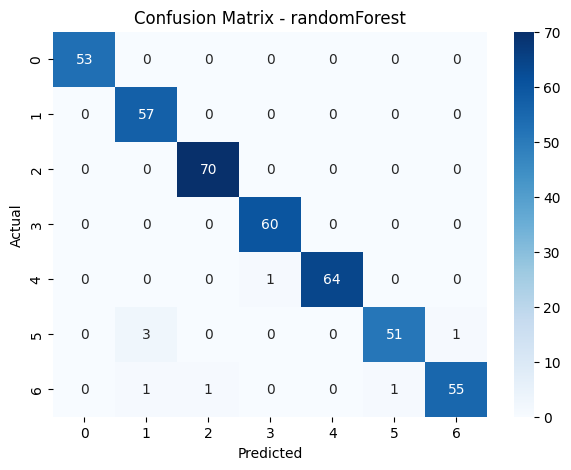

In [19]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - randomForest")
plt.show()

In [20]:
feature_cols=X_train.columns.tolist()
joblib.dump(feature_cols, 'models/feature_columns.pkl')

['models/feature_columns.pkl']

In [21]:
knn=KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [23]:
knn_pred=knn.predict(X_test)

In [24]:
accuracy_score(knn_pred,y_test)

0.8421052631578947

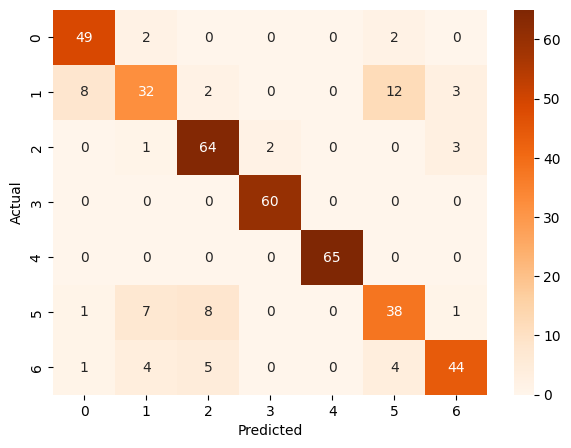

In [29]:
cm_knn=confusion_matrix(y_test,knn_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm_knn,annot=True,cmap="Oranges",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [31]:
f1_knn=f1_score(y_test,knn_pred,average='macro')
f1_knn

0.833007188226936